In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from PIL import Image, ImageDraw, ImageFont

In [2]:
font_dirs = ['/usr/share/fonts', '~/.fonts']
font_extensions = ['ttf', 'otf', 'ttc']

def is_fontfile(full_path):
    extension_dot = full_path.rfind('.')
    return (extension_dot != -1) and \
           (full_path[extension_dot + 1 :] in font_extensions)

In [3]:
alphabet = list('АБВГҐДЕЄЖЗИІЇЙКЛМНОПРСТУФХЦЧШЩЬЮЯабвгґдеєжзиіїйклмнопрстуфхцчшщьюя')[:33]
np.array(alphabet)

array(['А', 'Б', 'В', 'Г', 'Ґ', 'Д', 'Е', 'Є', 'Ж', 'З', 'И', 'І', 'Ї',
       'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х',
       'Ц', 'Ч', 'Ш', 'Щ', 'Ь', 'Ю', 'Я'], 
      dtype='<U1')

In [9]:
font_files = []

for fdir in font_dirs:
    for dirname, dirnames, filenames in os.walk(fdir):
        for filename in filenames:
            full_path = os.path.join(dirname, filename)

            if is_fontfile(full_path):
                font_files.append(full_path)
                
font_files[:5]

['/usr/share/fonts/opentype/stix/STIXGeneral-BoldItalic.otf',
 '/usr/share/fonts/opentype/stix/STIXIntegralsD-Regular.otf',
 '/usr/share/fonts/opentype/stix/STIXGeneral-Italic.otf',
 '/usr/share/fonts/opentype/stix/STIXSizeFourSym-Regular.otf',
 '/usr/share/fonts/opentype/stix/STIXVariants-Regular.otf']

In [69]:
def font_name(full_path):
    # Font name is between the last '/' and the last '.' symbols
    # Example:
    #     full path: '/usr/share/fonts/truetype/msttcorefonts/Courier_New_Bold_Italic.ttf'
    #     font name: 'Courier_New_Bold_Italic'
    return full_path[full_path.rfind('/') + 1 : full_path.rfind('.')]

# This will allow the font_name function to convert the whole
# vectors (arrays) of full pathes to font names
# font_name = np.vectorize(font_name)

# font_name(font_files)[100:110]

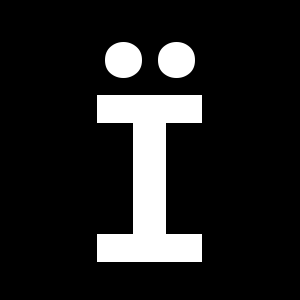

In [11]:
background_color = 0
fill_color = 255

def char_to_image(char, font_file, img_size):
    font_size = int(img_size * 0.9)
    
    img = Image.new('L', (img_size, img_size), background_color)
    drawer = ImageDraw.Draw(img)
    font = ImageFont.truetype(font_file, font_size) 
    
    # Get character width and height  
    (font_width, font_height) = font.getsize(char)  
  
    x = (img_size - font_width) / 2   
    y = (img_size - font_height) / 2  

    drawer.text((x, y), char, fill_color, font=font)
    
    return img

char_to_image('Ї', font_files[159], 300)

Same letter, different fonts

Letter 1: Б
Letter 2: Ш


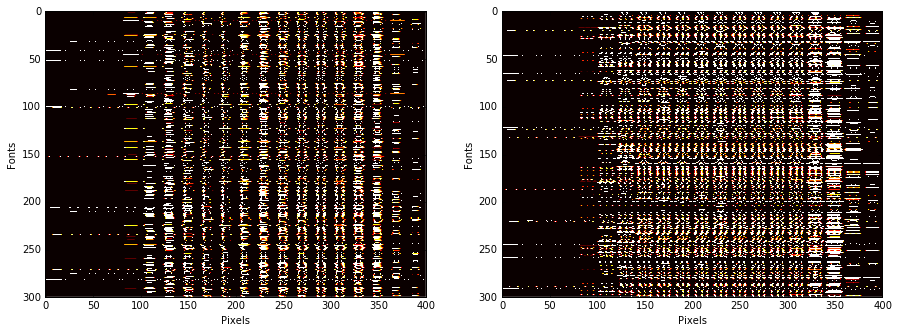

In [12]:
i = [np.random.randint(0, len(alphabet)) for _ in range(2)]

imgs = [[], []]

for _ in range(300):
    j = [np.random.randint(0, len(font_files)) for _ in range(2)]
    
    imgs[0].append(np.array(char_to_image(alphabet[i[0]], font_files[j[0]], 20)).reshape(400))
    imgs[1].append(np.array(char_to_image(alphabet[i[1]], font_files[j[1]], 20)).reshape(400))

pylab.rcParams['figure.figsize'] = 15, 15
fig = plt.figure()

subplots = []

for k in range(2):
    subplots.append(fig.add_subplot(1,2,k+1))
    subplots[k].set_xlabel('Pixels')
    subplots[k].set_ylabel('Fonts')
    subplots[k].imshow(imgs[k], cmap='hot', interpolation='none')

print('Letter 1:', alphabet[i[0]])
print('Letter 2:', alphabet[i[1]])

Font 1: Georgia_Bold_Italic
Font 2: UbuntuMono-BI


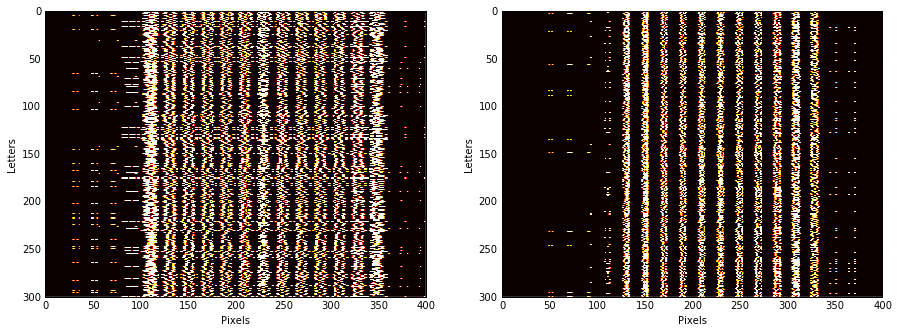

In [13]:
j = [np.random.randint(0, len(font_files)) for _ in range(2)]

imgs = [[], []]

for _ in range(300):
    i = [np.random.randint(0, len(alphabet)) for _ in range(2)]
    
    imgs[0].append(np.array(char_to_image(alphabet[i[0]], font_files[j[0]], 20)).reshape(400))
    imgs[1].append(np.array(char_to_image(alphabet[i[1]], font_files[j[1]], 20)).reshape(400))

pylab.rcParams['figure.figsize'] = 15, 15
fig = plt.figure()

subplots = []

for k in range(2):
    subplots.append(fig.add_subplot(1,2,k+1))
    subplots[k].set_xlabel('Pixels')
    subplots[k].set_ylabel('Letters')
    subplots[k].imshow(imgs[k], cmap='hot', interpolation='none')

print('Font 1:', font_name(font_files[j[0]]))
print('Font 2:', font_name(font_files[j[1]]))

In [133]:
im_size = 28

labels = []
fonts = []
images = []

for i in range(len(alphabet)):
    for font_file in font_files:
        labels.append(i)
        fonts.append(font_name(font_file))
        images.append((np.array(char_to_image(alphabet[i], font_file, im_size)).reshape(im_size ** 2)))

In [134]:
df = pd.DataFrame()
df['label'] = labels
df['font'] = fonts
df['image'] = images

df.head()

,label,font,image
0,0,STIXGeneral-BoldItalic,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,0,STIXIntegralsD-Regular,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,STIXGeneral-Italic,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,STIXSizeFourSym-Regular,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,STIXVariants-Regular,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [135]:
labels = [np.random.randint(0, len(alphabet)) for _ in range(2)]
inlist = np.vectorize(lambda x: x in labels)

selected = [df[(inlist(df['label'])) & (df['font'].str.contains(font_word))] for font_word in ['Sans', 'Serif']]
selected[0].head()

,label,font,image
5287,17,NotoSansCJK-Light,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5288,17,NotoSansCJK-Bold,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5289,17,NotoSansCJK-Medium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5290,17,NotoSansCJK-Thin,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5291,17,NotoSansCJK-Black,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


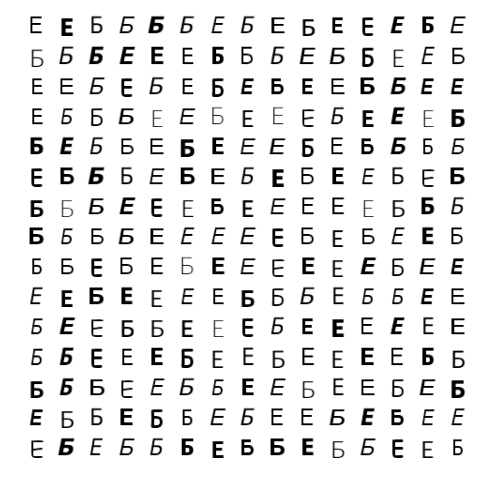

In [126]:
side = 15

pylab.rcParams['figure.figsize'] = 8, 8
fig = plt.figure()

for i in range(side):
    for j in range(side):
        k = np.random.randint(0, len(selected[0]))
        
        subplot = fig.add_subplot(side,side,i*side + j + 1) 
        subplot.set_axis_off()
        subplot.imshow(selected[0].iloc[k]['image'].reshape([im_size, im_size]), cmap='Greys')

In [136]:
df.to_csv('uaset.csv', index=False)

In [137]:
df = pd.read_csv('uaset.csv')
df.head()

,label,font,image
0,0,STIXGeneral-BoldItalic,[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,0,STIXIntegralsD-Regular,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,0,STIXGeneral-Italic,[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,0,STIXSizeFourSym-Regular,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
4,0,STIXVariants-Regular,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
